In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from utils.data_utils import *
from utils.model_utils import *
from utils.insert_shapelet import multiple_insert_shapelet

from sklearn.model_selection import train_test_split

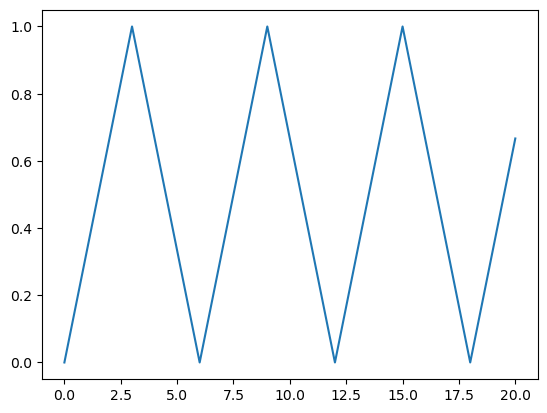

In [2]:
def create_1d_zigzag_array(seq_len, cycle_len):
    """
    Generate a zigzag pattern for a sequence.
    
    Parameters:
        seq_len (int): Total sequence length.
        cycle_len (int): Length of one zigzag cycle (up and down).
    
    Returns:
        np.ndarray: An array containing the zigzag pattern.
    """
    # Ensure cycle_len is at least 2 to create a zigzag pattern
    if cycle_len < 2:
        raise ValueError("cycle_len must be at least 2.")
    
    # Generate one cycle of the zigzag (up and down)
    half_cycle = cycle_len // 2
    upward = np.arange(half_cycle) / half_cycle  # e.g., [0, 1, 2, ...]
    downward = np.arange(half_cycle, 0, -1)  / half_cycle  # e.g., [2, 1]
    full_cycle = np.concatenate((upward, downward[:cycle_len - len(upward)]))
    
    # Tile the cycles to cover the full sequence length
    num_repeats = (seq_len + len(full_cycle) - 1) // len(full_cycle)
    zigzag = np.tile(full_cycle, num_repeats)[:seq_len]
    
    return zigzag

# Example: create a zigzag array of size 10
zigzag_array = create_1d_zigzag_array(21, 7)
plt.plot(zigzag_array)

In [66]:
s1 = np.concatenate((np.arange(0,1.1,0.1),np.arange(0.9,-0.1,-0.1)))-0.5  #np.concatenate((np.arange(-0.5,0.5,0.1),np.arange(0.5,-0.6,-0.1))) + 0.5
s2 = -(np.concatenate((np.arange(0,1.1,0.1),np.arange(0.9,-0.1,-0.1)))-0.5)  #np.concatenate((np.arange(0.5,-0.5,-0.1),np.arange(-0.5,0.6,0.1))) - 0.5
s3 = np.array([0.5]*21)    #np.sin(np.linspace(0,np.pi,21)) #np.array([1]*21)
s4 = np.array([-0.5]*21)  ##np.arange(0,-1.05,-0.05) #-np.sin(np.linspace(0,np.pi,21)) # np.array([-1]*21)
s5 = np.arange(-0.5,0.6,0.1)+0.5
s6 = np.arange(0.5,-0.6,-0.1)+0.5
s7 = np.sin(np.linspace(0,2*np.pi,21)) + np.sin(np.linspace(0,4*np.pi,21))
s8 = np.cos(np.linspace(0,2*np.pi,21)) + np.cos(np.linspace(0,4*np.pi,21))
s9 = create_1d_zigzag_array(21, 7)*4-2

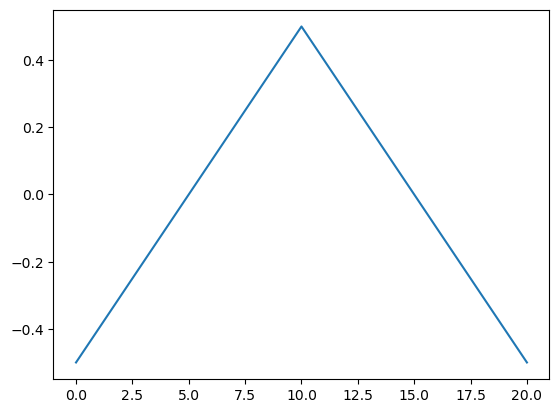

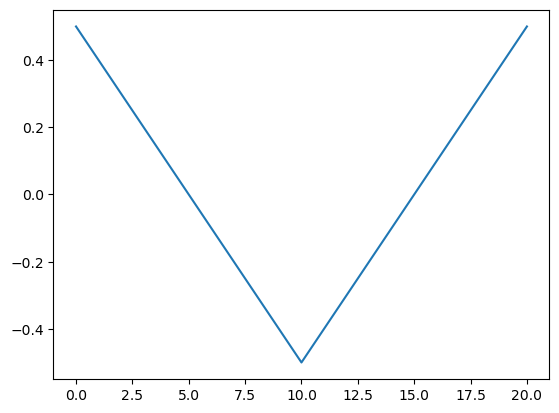

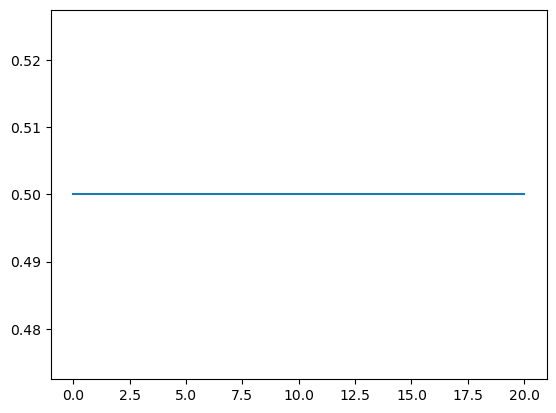

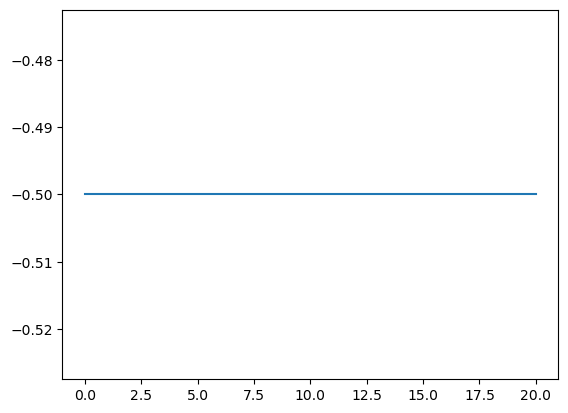

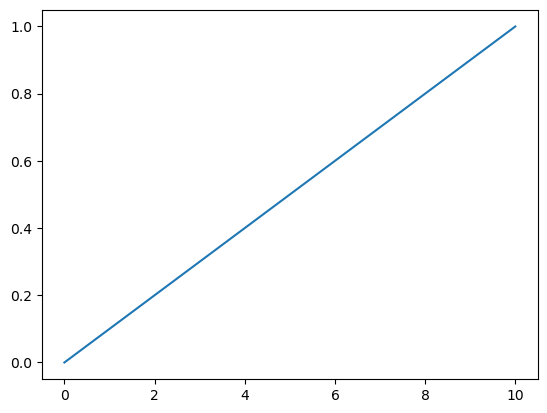

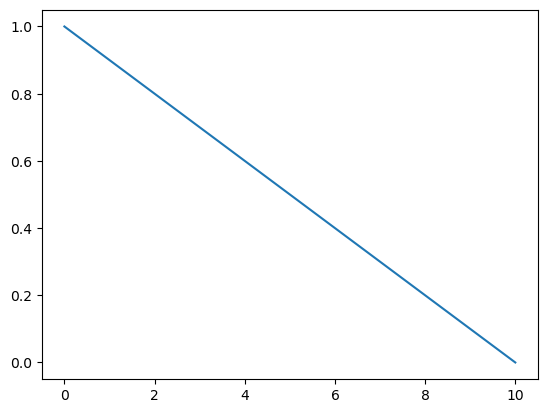

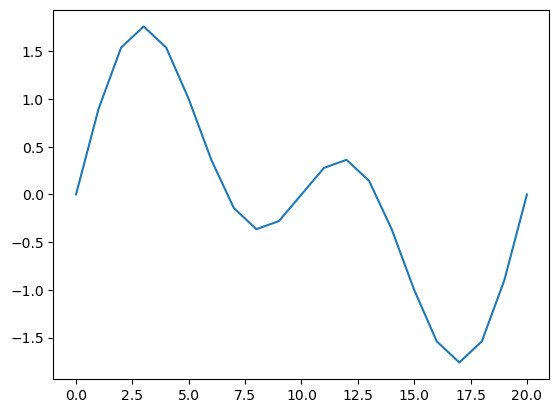

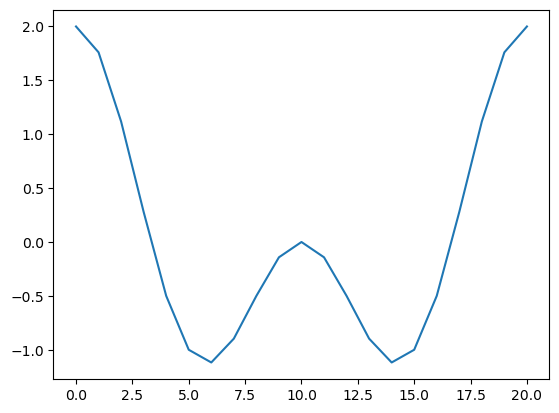

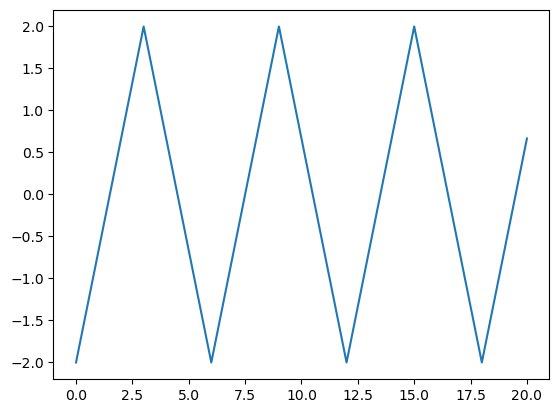

In [67]:
plt.plot(s1,label='s1')
plt.show()
plt.plot(s2,label='s2')
plt.show()
plt.plot(s3,label='s3')
plt.show()
plt.plot(s4,label='s4')
plt.show()
plt.plot(s5,label='s5')
plt.show()
plt.plot(s6,label='s6')
plt.show()
plt.plot(s7,label='feature')
plt.show()
plt.plot(s8,label='seen non-feature')
plt.show()
plt.plot(s9,label='unseen non-feature')
plt.show()
# plt.legend()

In [68]:
def data_shapelet(shapelets,mean = 0,input_length=150, shapelet_length=21,std_dev = 0.01,num = 500):

    c = np.zeros((num,1,input_length))
    num_shapelet = len(shapelets)
    for i in range(num):

        a = np.zeros(input_length) 

        # instance_startings = multiple_insert_shapelet(input_length, num_shapelet, shapelet_length)
        starting_0 = np.random.randint(21,50)
        starting_1 = np.random.randint(100,input_length-shapelet_length-21)
        # starting = np.random.randint(input_length-shapelet_length)
        a[starting_0:starting_0 + shapelet_length] = shapelets[0]
        a[starting_1:starting_1 + shapelet_length] = shapelets[1]   
        a = a + np.random.normal(mean, std_dev, a.shape)
        c[i] = a.reshape(1,input_length)
    return c #z_normalization(c)

In [69]:
input_length= 150
shapelet_length=21
std_dev = 0.02
num = 100

In [70]:
def data_generation(num=100):
    c0_1 = data_shapelet([s1,s3], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    c0_2 = data_shapelet([s2,s4], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    # c0_3 = data_shaplet([s1,s6], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    # c0_4 = data_shaplet([s1], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    
    c1_1 = data_shapelet([s1,s4], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    c1_2 = data_shapelet([s2,s3], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    # c1_3 = data_shaplet([s6], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    # c1_4 = data_shaplet([], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    

    return np.concatenate([c0_1,c0_2,c1_1,c1_2]), np.concatenate([[0]*num*2,[1]*num*2])
train_x, train_y = data_generation(num=100)
test_x, test_y = data_generation(num=100)

enc1 = sklearn.preprocessing.OneHotEncoder(sparse_output=False).fit(train_y.reshape(-1, 1))
train_y = enc1.transform(train_y.reshape(-1, 1))
test_y = enc1.transform(test_y.reshape(-1, 1))

In [71]:
model_name = 'InceptionTime'
task = 'motiv1'
model_dataset_path = f'models/{model_name}/{task}/'
device = 'cuda'

In [72]:
# enc1 = sklearn.preprocessing.OneHotEncoder(sparse_output=False).fit(train_y.reshape(-1, 1))
# train_y = enc1.transform(train_y.reshape(-1, 1))
# test_y = enc1.transform(test_y.reshape(-1, 1))
data = {
    'train_x': train_x,
    'test_x': test_x,
    'train_y': train_y,
    'test_y': test_y
}

if not os.path.exists(model_dataset_path):
    os.makedirs(model_dataset_path)

with open(model_dataset_path+'/data.pkl', 'wb') as f:
    pickle.dump(data, f)

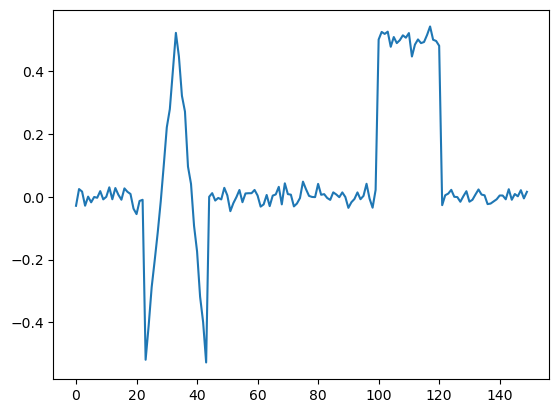

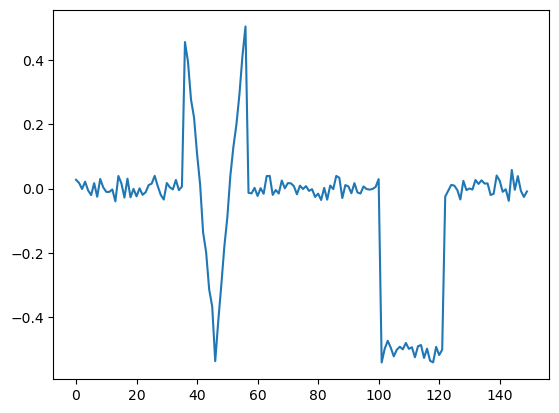

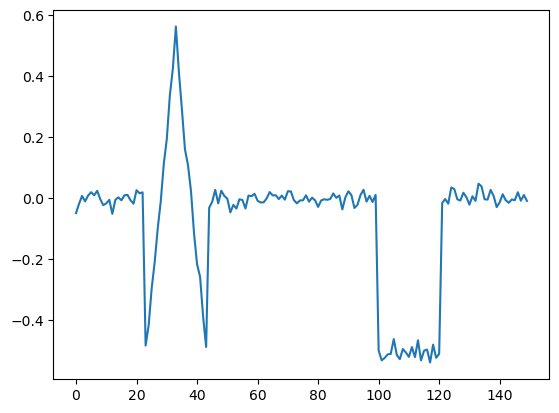

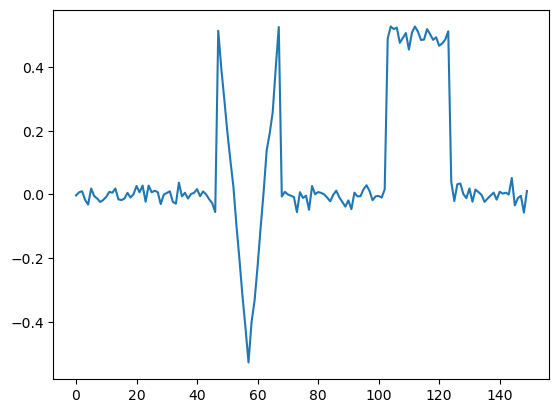

In [73]:
plt.plot(test_x[0].flatten(),label='c0')
plt.show()
plt.plot(test_x[100].flatten(),label='c0')
plt.show()
plt.plot(test_x[200].flatten(),label='c1')
plt.show()
plt.plot(test_x[300].flatten(),label='c1')
plt.show()

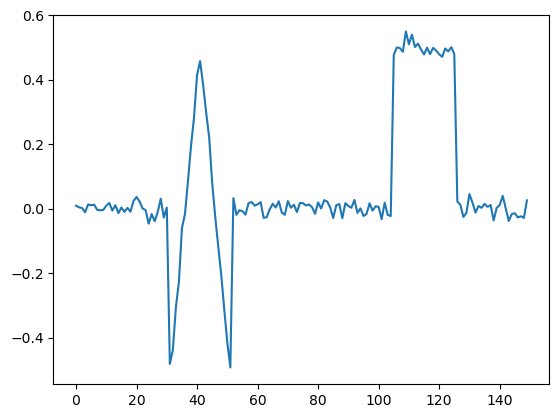

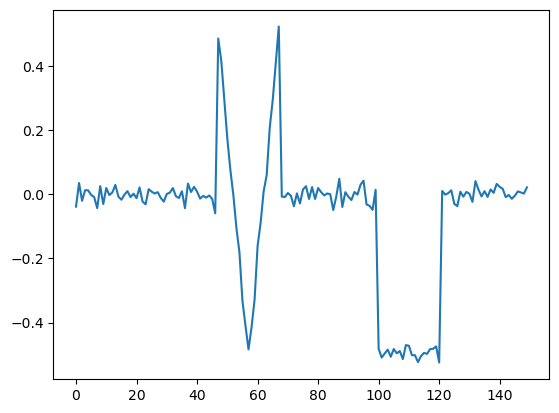

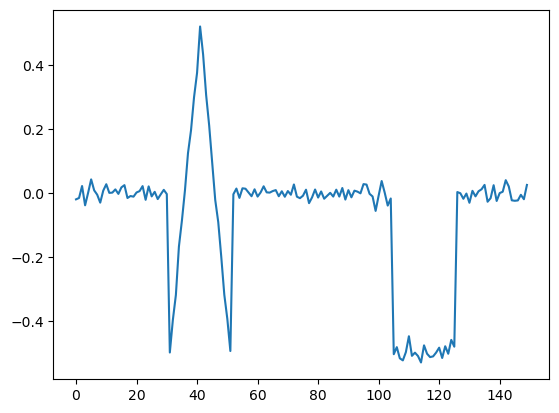

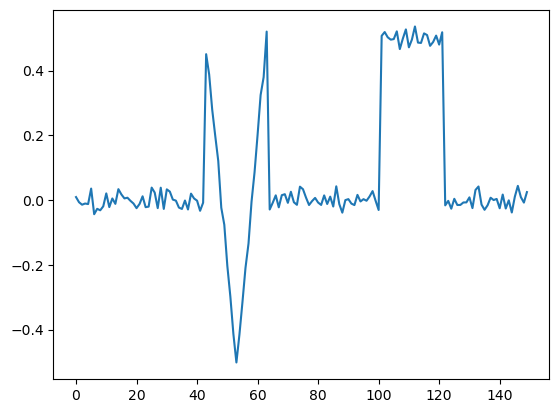

In [74]:
plt.plot(train_x[0].flatten(),label='c0')
plt.show()
plt.plot(train_x[100].flatten(),label='c0')
plt.show()
plt.plot(train_x[200].flatten(),label='c1')
plt.show()
plt.plot(train_x[300].flatten(),label='c1')
plt.show()
# plt.legend()

In [75]:
model = InceptionTime(c_in=1, c_out=2)
train_loader, test_loader = generate_loader(train_x, test_x, train_y, test_y, batch_size_train=128, batch_size_test=32)
fit(model, train_loader, device=device, num_epochs=500)

torch.save(model.state_dict(), f'{model_dataset_path}/weight.pt')
test_preds, ground_truth = get_all_preds(model, test_loader, device=device)
ground_truth = np.argmax(ground_truth, axis=1)
np.save(f'{model_dataset_path}/test_preds.npy', np.array(test_preds))
acc = accuracy_score(ground_truth, test_preds)
print(f'test_preds acc:{acc:.3f}')
a = classification_report(ground_truth, test_preds, output_dict=True)
dataframe = pd.DataFrame.from_dict(a)
dataframe.to_csv(f'{model_dataset_path}/classification_report.csv', index=False)


train_preds, ground_truth = get_all_preds(model, train_loader, device=device)
ground_truth = np.argmax(ground_truth, axis=1)
# np.save(f'{model_dataset_path}/test_preds.npy', np.array(test_preds))
acc = accuracy_score(ground_truth, train_preds)
print(f'train_preds acc:{acc:.3f}')

100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [00:25<00:00, 19.24it/s]

test_preds acc:1.000
train_preds acc:1.000


In [76]:
from utils.insert_shapelet import get_attr
from utils.visualization import plot_multiple_images_with_attribution

/home/zwkan/miniconda3/envs/XAI2/lib/python3.11/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


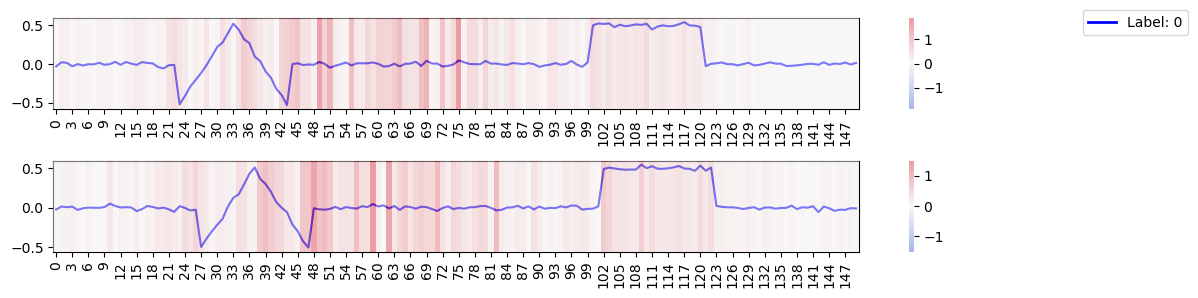

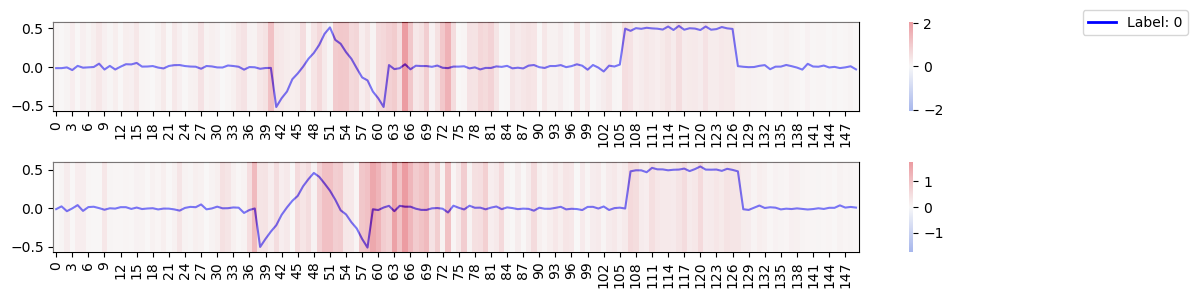

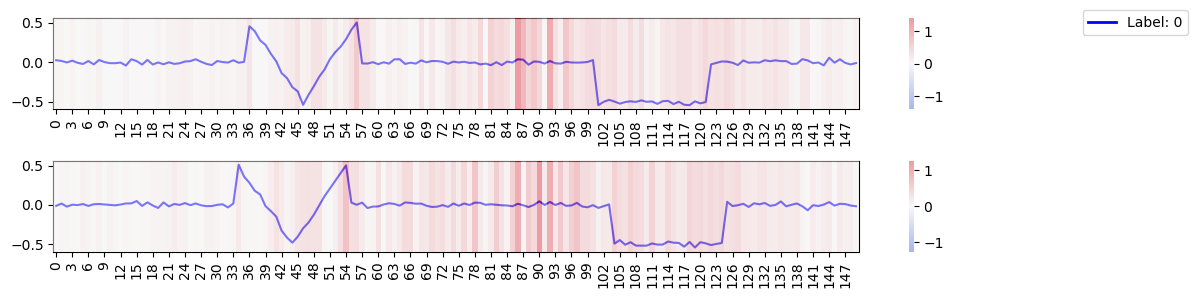

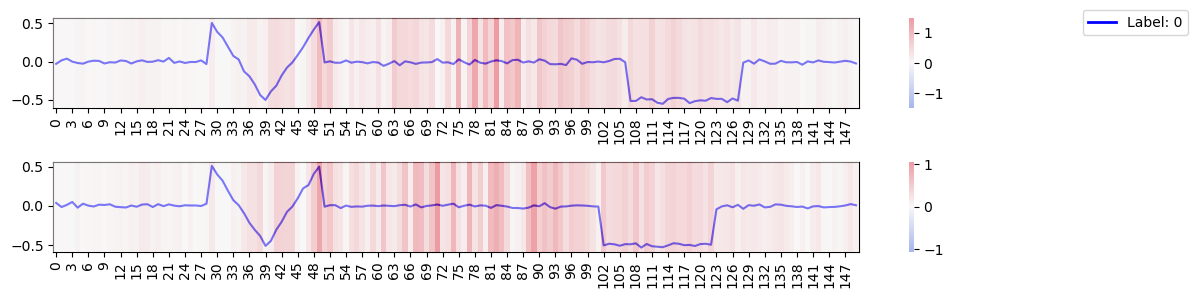

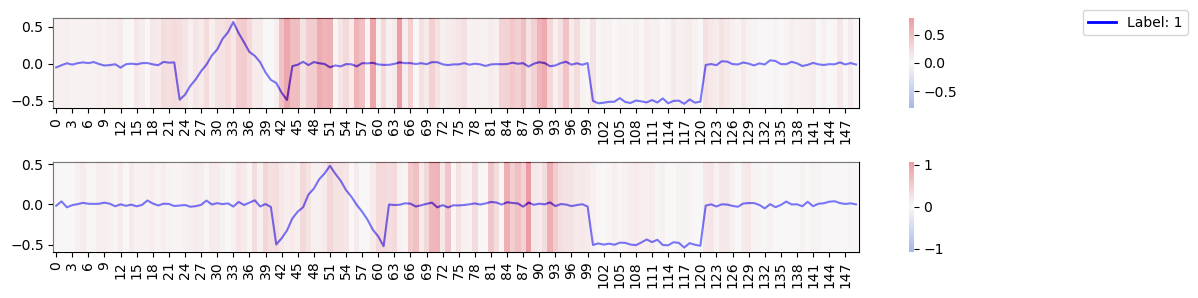

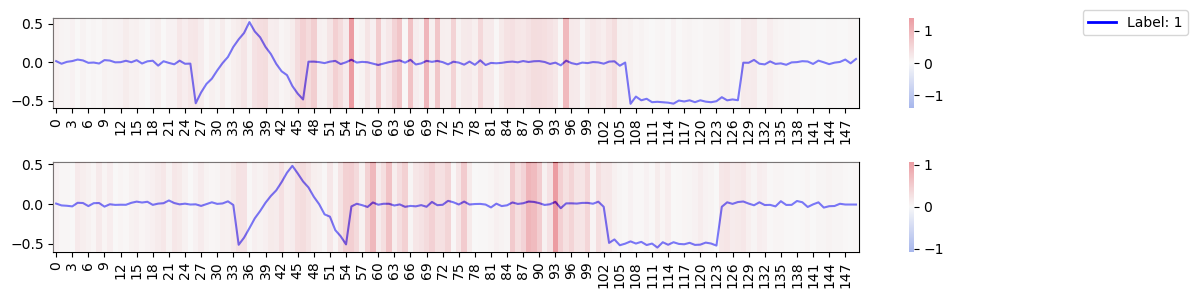

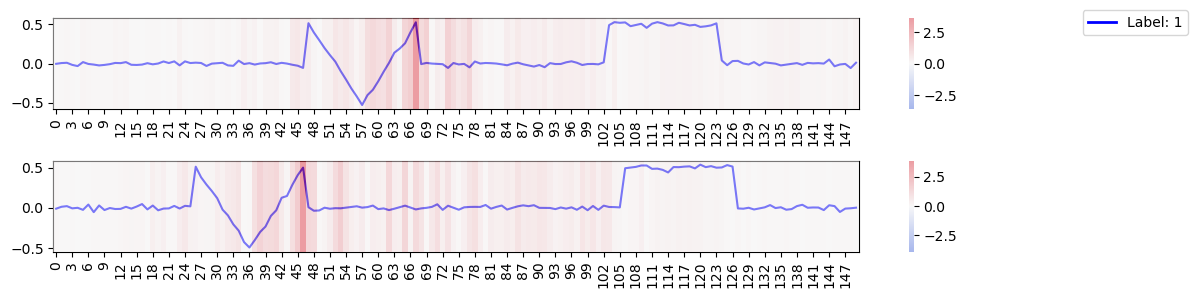

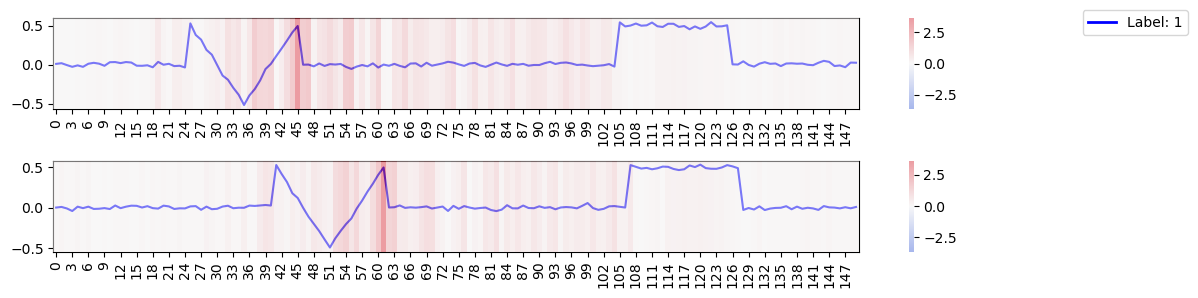

In [77]:

attr_class = None
for xai_name in ['Saliency']:
    attr_save_dir = f'attributions/{model_name}/{task}/{xai_name}/'


    attr, _ = get_attr(model, test_x, None, None,
                      save_dir=os.path.join(attr_save_dir, 'test_exp.pkl'),
                      xai_name=xai_name, target_class=attr_class)

    # with open(f'./{model_dataset_path}/{xai_name}_exp.pkl', 'rb') as f:
    #     attr = pickle.load(f)
    # attr_gp = attr['attributions']
    for i in range(8):
        plot_multiple_images_with_attribution(test_x[0+i*50:50+i*50], test_y[0+i*50:50+i*50], 2,figsize=(12,3), 
                                      use_attribution=True,
                                      attributions=attr[0+i*50:50+i*50],
                                      normalize_attribution=True,
                                      save_path=None,
                                      test_y = test_y[0+i*50:50+i*50],
                                     )

# shapelet

In [78]:
# def data_generation_clean(num=10):
#     std_dev = 0
#     c0_1 = data_shapelet([s1,s3], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
#     c0_2 = data_shapelet([s2,s4], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
#     # c0_3 = data_shaplet([s1,s6], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
#     # c0_4 = data_shaplet([s1], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    
#     c1_1 = data_shapelet([s1,s4], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
#     c1_2 = data_shapelet([s2,s1], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
#     # c1_3 = data_shaplet([s6], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
#     # c1_4 = data_shaplet([], input_length=input_length, shapelet_length=shapelet_length,std_dev = std_dev,num = num)
    

#     return np.concatenate([c0_1,c0_2,c1_1,c1_2]), np.concatenate([[0]*num*2,[1]*num*2])
# # train_x, train_y = data_generation()
# test_x_clean, test_y_clean = data_generation_clean(num=10)

# enc1 = sklearn.preprocessing.OneHotEncoder(sparse_output=False).fit(train_y.reshape(-1, 1))
# train_y = enc1.transform(train_y.reshape(-1, 1))
# test_y = enc1.transform(test_y.reshape(-1, 1))

In [79]:
from pyts.transformation import ShapeletTransform

window_sizes = np.arange(10,22)
# window_sizes
st = ShapeletTransform(window_sizes=[20,21,22],random_state=42, sort=True, n_jobs=8)
X_new = st.fit_transform(test_x.reshape(test_x.shape[0],test_x.shape[-1]), np.argmax(test_y,axis=1))
# X_new = st.fit_transform(test_x, test_y)



In [80]:
from pyts.classification import LearningShapelets
clf = LearningShapelets(random_state=42, tol=0.01)
clf.fit(train_x.reshape(train_x.shape[0],train_x.shape[-1]), np.argmax(train_y,axis=1))

LearningShapelets(random_state=42, tol=0.01)

In [81]:
clf.predict(test_x.reshape(test_x.shape[0],test_x.shape[-1]))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [82]:
clf.shapelets_[0,:4]

array([array([ 1.30446849e-04,  5.98132631e-05,  3.09999037e-05, -3.70970738e-05,
               2.32172391e-05, -1.42357339e-05, -1.67650297e-05, -4.18044448e-05,
              -5.49150747e-05, -1.21219613e-04, -1.51503460e-04, -1.69212398e-04,
              -1.58220791e-04, -1.21192771e-04,  7.31241557e-03])                ,
       array([-4.99186525e-01, -4.99833244e-01, -5.01102157e-01, -5.01050103e-01,
              -5.00487845e-01, -4.99822220e-01, -5.00047173e-01, -5.00029869e-01,
              -4.99733402e-01, -4.99960842e-01, -4.99901836e-01, -3.32962767e-01,
              -1.65840448e-01,  4.22968716e-04, -2.30223258e-05])                ,
       array([0.44505918, 0.50035269, 0.50050053, 0.50019432, 0.49986989,
              0.49978933, 0.49950354, 0.4997451 , 0.49951994, 0.49982068,
              0.49974249, 0.50001853, 0.50037682, 0.5004912 , 0.44522478]),
       array([ 3.50410126e-01,  4.00441819e-01,  4.51153408e-01,  3.17780936e-01,
               1.67863590e-01,  8.74

[356  17  38] [0. 1.]


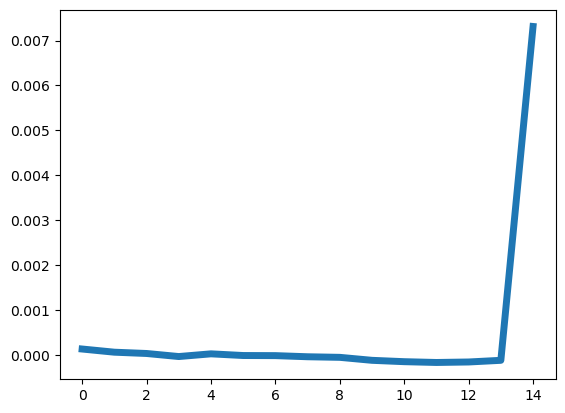

[356  17  38] [0. 1.]


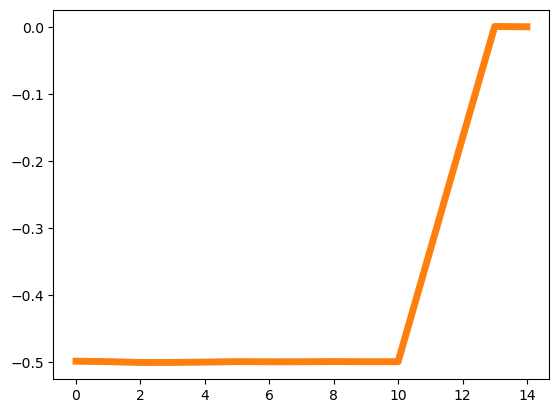

[356  17  38] [0. 1.]


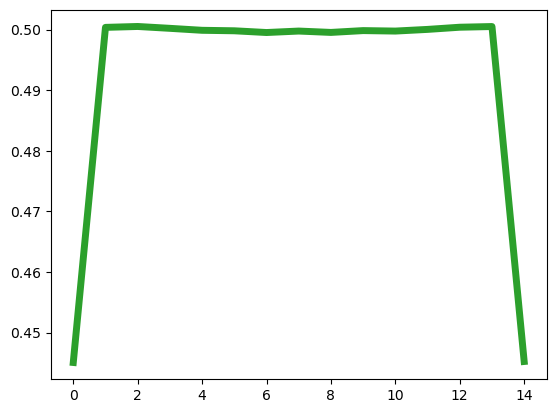

[356  17  38] [0. 1.]


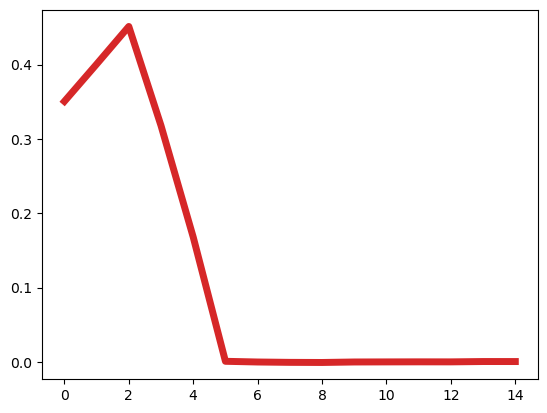

In [83]:
for i, shapelet in enumerate(clf.shapelets_[0,:4]):
    idx, start, end = index
    print(index,test_y[idx])
    # plt.plot(test_x[idx].flatten(), color='C{}'.format(i),
    #          label='Sample {}'.format(idx))
    # plt.plot(np.arange(start, end), test_x[idx,:, start:end].flatten(),
    #          lw=5, color='C{}'.format(i))
    plt.plot(shapelet.flatten(),
         lw=5, color='C{}'.format(i))
    plt.show()


In [84]:
print(np.mean(X_new[:100,0]))
print(np.mean(X_new[100:200,0]))
print(np.mean(X_new[200:300,0]))
print(np.mean(X_new[300:400,0]))

0.1691320657690583
0.025570246678537537
0.025782674983300044
0.19903188696762886


[199  93 113] [1. 0.]


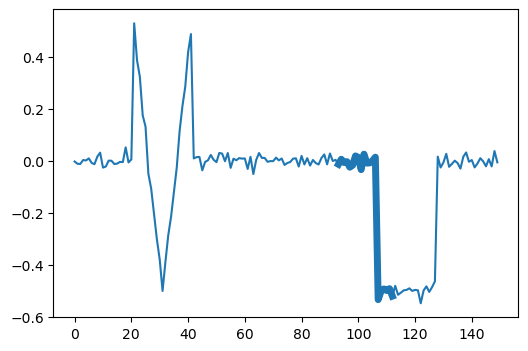

[  4  87 109] [1. 0.]


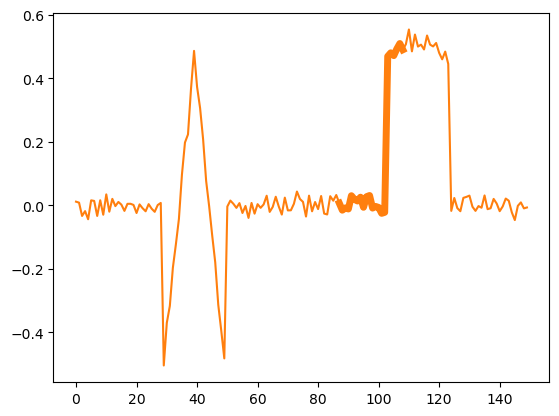

[ 40  88 108] [1. 0.]


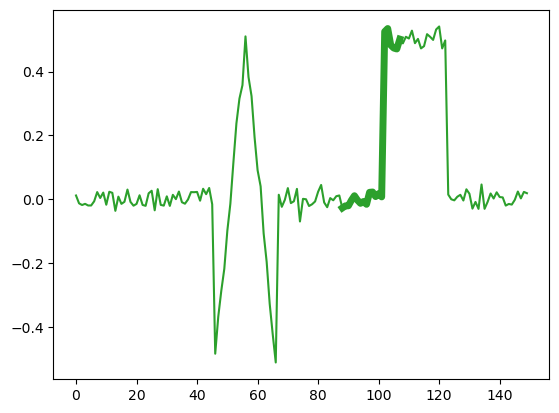

[18 25 47] [1. 0.]


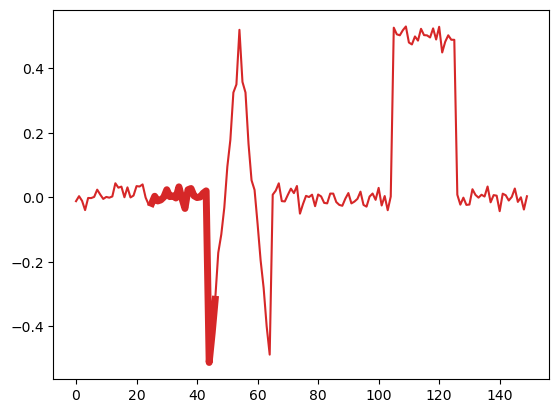

[342   7  27] [0. 1.]


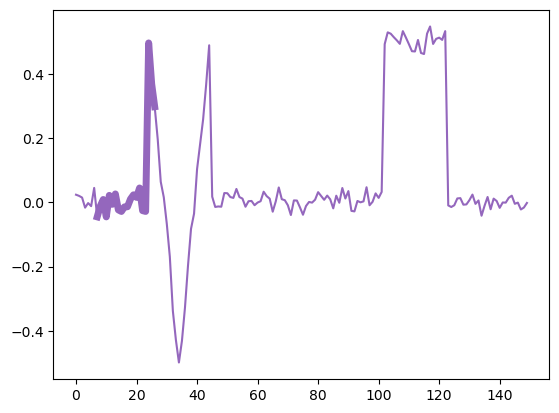

[120  93 115] [1. 0.]


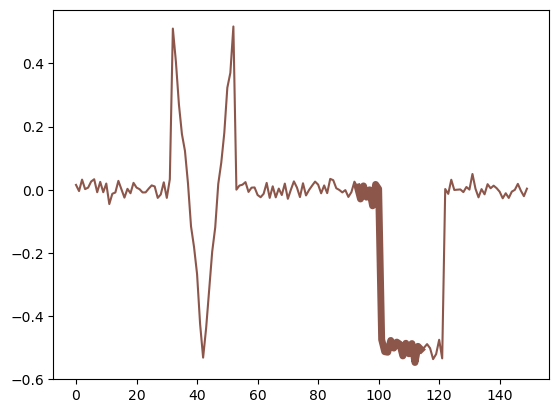

[266  95 115] [0. 1.]


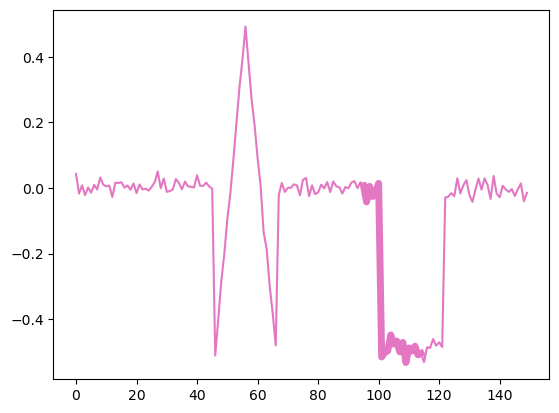

[ 6 20 40] [1. 0.]


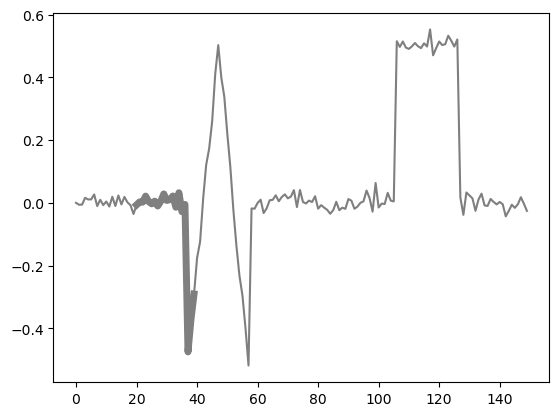

[123  64  84] [1. 0.]


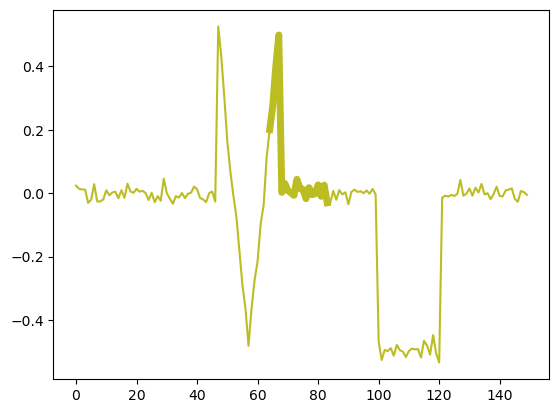

[ 79  99 119] [1. 0.]


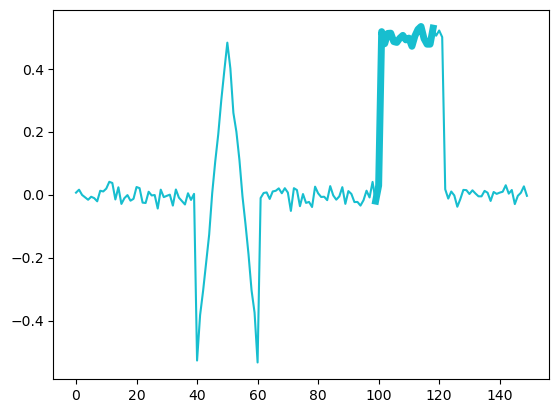

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


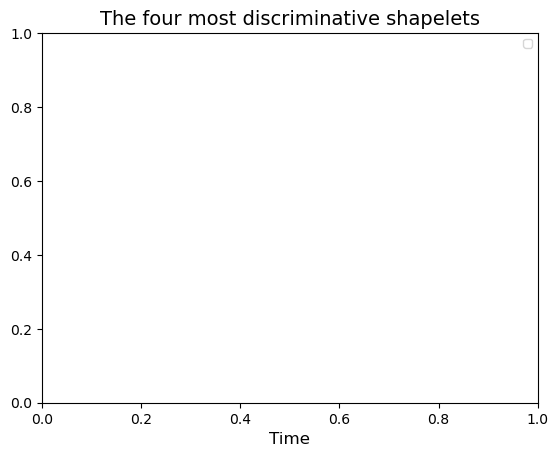

In [90]:
plt.figure(figsize=(6, 4))

results = []

for i, index in enumerate(st.indices_[:10]):
    idx, start, end = index

    item = {'sample': test_x[idx], 'start': start, 'end': end, 'idx': idx}
    results.append(item)
    
    print(index,test_y[idx])
    plt.plot(test_x[idx].flatten(), color='C{}'.format(i),
             label='Sample {}'.format(idx))
    plt.plot(np.arange(start, end), test_x[idx,:, start:end].flatten(),
             lw=5, color='C{}'.format(i))
    plt.show()
plt.xlabel('Time', fontsize=12)
plt.title('The four most discriminative shapelets', fontsize=14)
plt.legend(loc='best', fontsize=8)
plt.show()


with open('./output/motiv1/ST.pkl', 'wb') as f:
    pickle.dump(results,f)

In [12]:
with open(f'models/{model_name}/{task}/data.pkl', 'rb') as f:
    data = pickle.load(f)
train_x, test_x, train_y, test_y = data['train_x'], data['test_x'], data['train_y'], data['test_y']

In [15]:
x= test_x.transpose(0, 2, 1)

In [20]:
dataset = 'GunPoint'
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(dataset)
X_train = X_train.transpose(0, 2, 1)
X_test = X_test.transpose(0, 2, 1)
clf = ShapeletTransformClassifier(
    estimator=RotationForestClassifier(n_estimators=3),
    n_shapelet_samples=100,
    max_shapelets=10,
    batch_size=20,
    random_state=42,
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Correct classification rate:{acc:.2f}")

Correct classification rate:0.96


In [37]:
# from sktime.classification.shapelet_based import ShapeletTransformClassifier
# from sktime.classification.sklearn import RotationForest
# # from sktime.datasets import load_unit_test
# # X_train, y_train = load_unit_test(split="train", return_X_y=True)
# # X_test, y_test = load_unit_test(split="test", return_X_y=True) 
# clf = ShapeletTransformClassifier(
#     estimator=RotationForest(n_estimators=3),
#     n_shapelet_samples=100,
#     max_shapelets=10,
#     batch_size=20,
# ) 
# clf.fit(x, np.argmax(train_y,axis=1))
# y_pred = clf.predict(x) 

In [36]:
from aeon.classification.shapelet_based import ShapeletTransformClassifier
from aeon.classification.sklearn import RotationForestClassifier

x = test_x.transpose(0, 2, 1)

print(x.shape)
clf = ShapeletTransformClassifier(
    estimator=RotationForestClassifier(n_estimators=3),
    n_shapelet_samples=100,
    max_shapelets=10,
    # max_shapelet_length=30,
    batch_size=20,
    random_state=42,
)
clf.fit(x, np.argmax(train_y,axis=1))

y_pred = clf.predict(x)
acc = accuracy_score(np.argmax(train_y,axis=1), y_pred)
print(f"Correct classification rate:{acc:.2f}")


(400, 150, 1)


ValueError: high <= 0